# Searching for breast cancer patterns in fine-needle aspiration (FNA) cytology

In [181]:
import duckdb
import pandas as pd

import plotly.express as px
import seaborn as sns
import streamlit as st
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import root_mean_squared_error,mean_squared_error, r2_score
#%matplotlib notebook
#matplotlib.use('Agg')

In [182]:
conn = duckdb.connect()  

In [183]:
query = """
CREATE TABLE mytable AS
SELECT 
    column00 AS ID,
    column01 AS Diagnosis,
    column02 AS radius1,
    column03 AS texture1,
    column04 AS perimeter1,
    column05 AS area1,
    column06 AS smoothness1,
    column07 AS compactness1,
    column08 AS concavity1,
    column09 AS concave_points1,
    column10 AS symmetry1,
    column11 AS fractal_dimension1,
    column12 AS radius2,
    column13 AS texture2,
    column14 AS perimeter2,
    column15 AS area2,
    column16 AS smoothness2,
    column17 AS compactness2,
    column18 AS concavity2,
    column19 AS concave_points2,
    column20 AS symmetry2,
    column21 AS fractal_dimension2,
    column22 AS radius3,
    column23 AS texture3,
    column24 AS perimeter3,
    column25 AS area3,
    column26 AS smoothness3,
    column27 AS compactness3,
    column28 AS concavity3,
    column29 AS concave_points3,
    column30 AS symmetry3,
    column31 AS fractal_dimension3,
    

FROM read_csv_auto('wdbc.data');
"""
 #Creates table (executes the query above)
conn.execute(query)

In [184]:
## select all the datatable (* means all columns)
query = """
select * 
from mytable
"""
# transform into dataframe (same as R)
df = conn.sql(query).df()
df_with_id = df.copy()

df = df.drop('ID', axis=1)
df


,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [185]:
"""
    Important Metadatas
    2) Diagnosis (M = malignant, B = benign)

    Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)	
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)
 	
"""

'\n    Important Metadatas\n    2) Diagnosis (M = malignant, B = benign)\n\n    Ten real-valued features are computed for each cell nucleus:\n\n\ta) radius (mean of distances from center to points on the perimeter)\n\tb) texture (standard deviation of gray-scale values)\t\n\tc) perimeter\n\td) area\n\te) smoothness (local variation in radius lengths)\n\tf) compactness (perimeter^2 / area - 1.0)\n\tg) concavity (severity of concave portions of the contour)\n\th) concave points (number of concave portions of the contour)\n\ti) symmetry \n\tj) fractal dimension ("coastline approximation" - 1)\n \t\n'

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Diagnosis           569 non-null    object 
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    float64
 16  compactn

In [187]:
df.describe()


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [188]:
print(df[['radius1', 'radius2', 'radius3']].describe())
"""
    feature1 - Mean
	feature2 - SD
	feature3 - Max
"""

          radius1     radius2     radius3
count  569.000000  569.000000  569.000000
mean    14.127292    0.405172   16.269190
std      3.524049    0.277313    4.833242
min      6.981000    0.111500    7.930000
25%     11.700000    0.232400   13.010000
50%     13.370000    0.324200   14.970000
75%     15.780000    0.478900   18.790000
max     28.110000    2.873000   36.040000


'\n    feature1 - Mean\n\tfeature2 - SD\n\tfeature3 - Max\n'

In [189]:
df["Diagnosis"] =  df["Diagnosis"].map({"M": 1, "B": 0})
#df["Diagnosis"].value_counts()
diagnosis_counts = df["Diagnosis"].value_counts()
diagnosis_counts
#No nulls

Diagnosis
0    357
1    212
Name: count, dtype: int64

## Imbalanced Datastet 
### 0(B): 62.7%  
### 1(M):37.3%

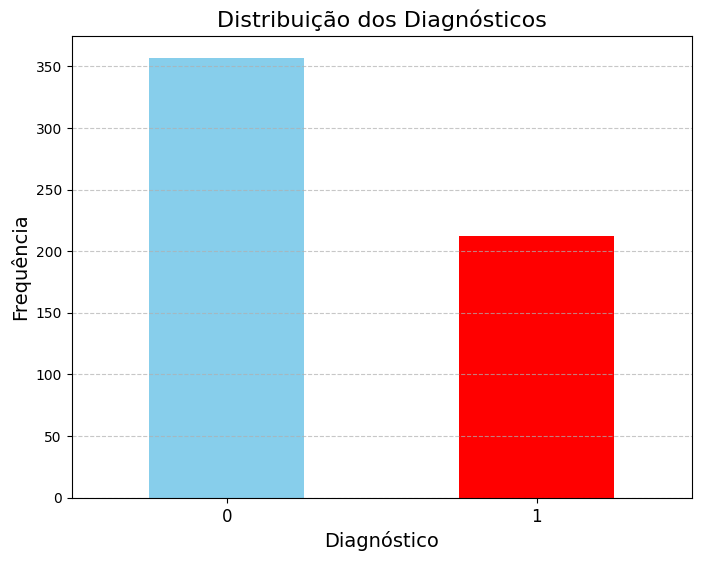

In [190]:
plt.figure(figsize=(8, 6))
diagnosis_counts.plot(kind='bar', color=['skyblue', 'red'])


plt.title('Distribuição dos Diagnósticos', fontsize=16)
plt.xlabel('Diagnóstico', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [191]:
query = """
select Diagnosis,
    AVG(radius1) AS avg_radius1,
    AVG(radius2) AS avg_radius2,
    AVG(radius3) AS avg_radius3  
from mytable
GROUP BY Diagnosis
"""
# transform into dataframe (same as R)
df1 = conn.sql(query).df()
df1

,Diagnosis,avg_radius1,avg_radius2,avg_radius3
0,B,12.146524,0.284082,13.379801
1,M,17.462830,0.609083,21.134811


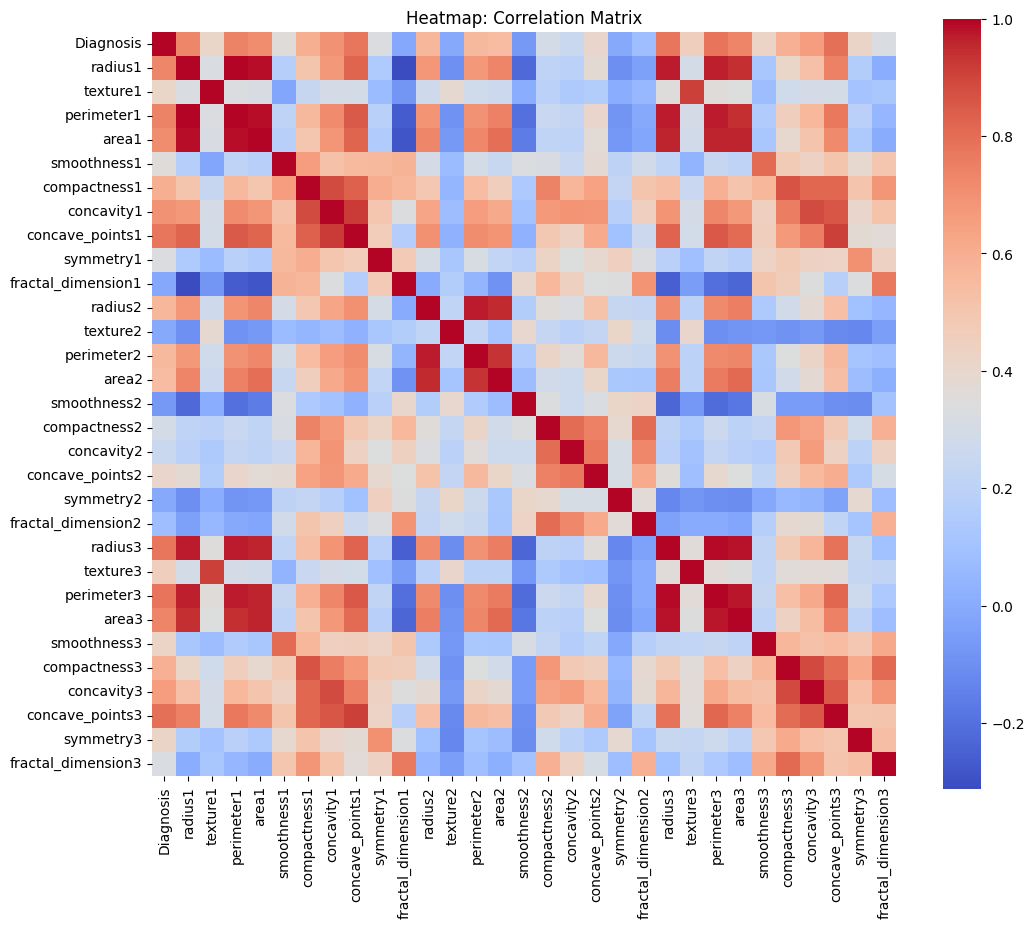

In [192]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', cbar=True, square=True, annot=False)
plt.title('Heatmap: Correlation Matrix')
plt.show()

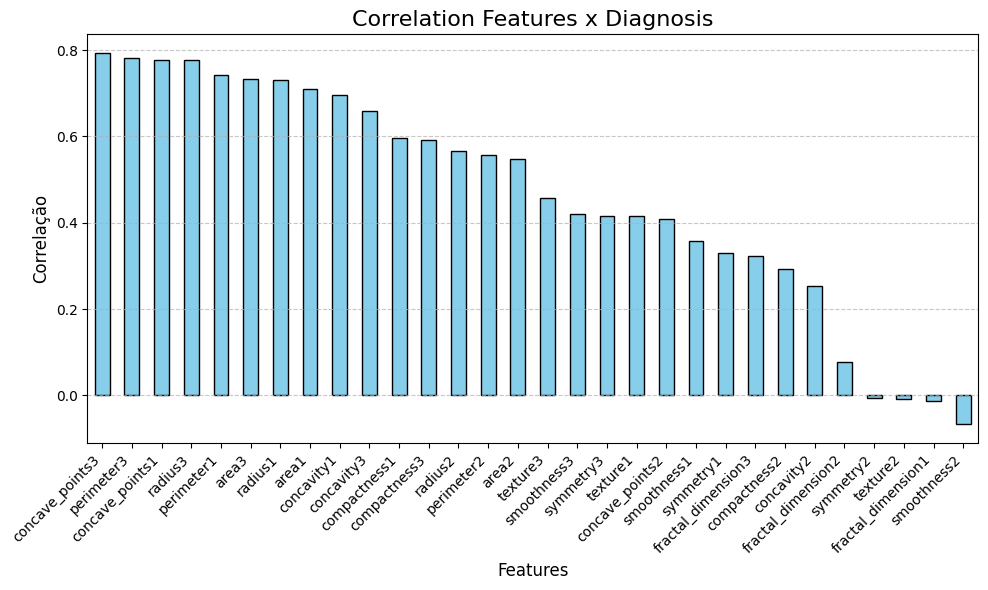

In [193]:
correlations = df.corr()["Diagnosis"].sort_values(ascending=False)
correlations = correlations.drop("Diagnosis")  # Remove a própria correlação de Diagnosis

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
correlations.plot(kind="bar", color="skyblue", edgecolor="black")

# Customizar o gráfico
plt.title("Correlation Features x Diagnosis", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Correlação", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [194]:
mean_features = df.groupby('Diagnosis').mean()
mean_features

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
Diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


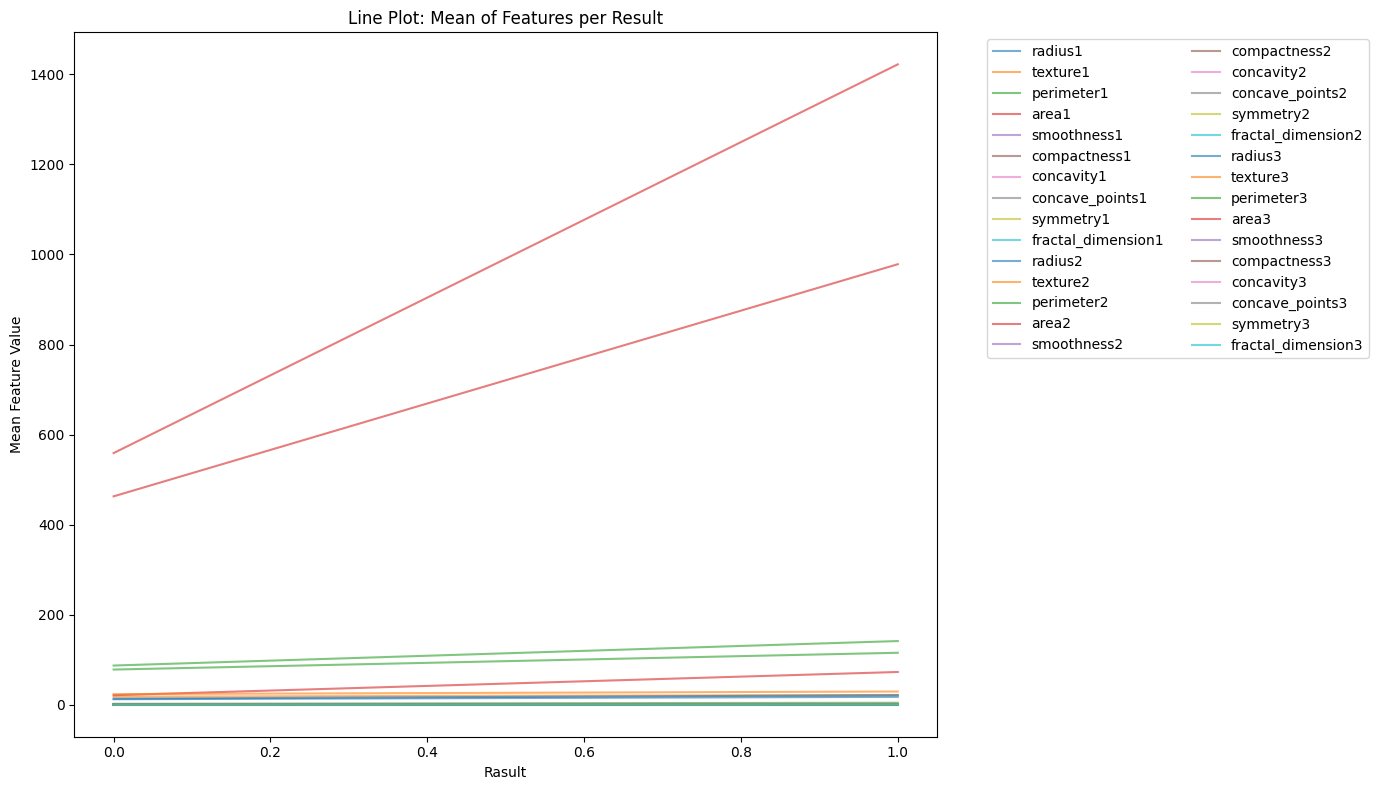

In [195]:
# Calcular a média das features agrupadas por target
mean_features = df.groupby('Diagnosis').mean()

plt.figure(figsize=(14, 8))
for feature in mean_features.columns:
    plt.plot(mean_features.index, mean_features[feature], label=feature, alpha=0.6)
    
plt.title('Line Plot: Mean of Features per Result')
plt.xlabel('Rasult')
plt.ylabel('Mean Feature Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.tight_layout()
plt.show()

<!-- 
### import packages that will be necessary down the line
import time

import duckdb
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import streamlit as st


## connecting to duckdb
conn = duckdb.connect()

# making a query that creates the table from my dataset downloaded from the internet
query = """
CREATE TABLE mytable AS
SELECT 
    column0 AS sepal_length,
    column1 AS sepal_width,
    column2 AS petal_length,
    column3 AS petal_width,
    column4 AS species
FROM read_csv_auto('iris/iris.data');
"""
# Creates table (executes the query above)
conn.execute(query)

# Part 1: Testing with Duck DB show()
start_time = time.time()

## select all the datatable (* means all columns)
query = """
select * 
from mytable
"""
# transform into dataframe (same as R)
df = conn.sql(query).df()


# title of the dashboard
st.title("Streamlit + duckdb Tutorial")
try:
    #create a button to use
    button = st.button(label="Check for a sample")

    # if button is pressed do something
    if button:
        # title if button is pressed
        st.write("## Sample")
        # show dataframe (first 10 rows) if button is pressed.
        st.dataframe(df.head(10), height=300)

    # another title
    st.write("## Visualization")
    ## create a selection box with the 4 options (sepal and petal length and width)
    option = st.selectbox(
        "Select a dimension",
        ["sepal_length", "sepal_width", "petal_width", "petal_length"],
        key="option",
    )
    # if a option is selected show something
    if option:
        # second option to use in double plots
        option2 = st.selectbox(
            "Select another dimension",
            ["sepal_length", "sepal_width", "petal_width", "petal_length"],
            key="option2",
        )
        # another title (is using markdown - hence the ###)
        st.write(f"### Scatter Plot: {option} x {option2}")

        ## create a scatter plot 
        fig = px.scatter(
            df,
            x=option,
            y=option2,
            color="species",
            hover_name="species",
            log_x=True,
        )

        # This is the default. So you can also omit the theme argument.
        st.plotly_chart(fig, theme="streamlit", use_container_width=True)
        
        # another title
        st.write(f"### Boxplot: {option} x Specices")
        # another setup of plot
        fig, ax = plt.subplots()


        # a boxplot with the seaborn lib (see above)
        sns.boxplot(data=df, x="species", y=option, ax=ax)
        # adding it to the dashboard
        st.pyplot(fig)

        st.write("### Bar Chart: Species x Count")
        st.bar_chart(df["species"].value_counts())

    st.write("## Filters (by Species)")
    distinct_query = "SELECT DISTINCT species FROM mytable;"
    distinct_values = conn.execute(distinct_query).fetchall()

    # Convert results to a list of distinct values
    distinct_values_list = [value[0] for value in distinct_values]

    product_filter = st.selectbox(
        label="Select a specices", options=distinct_values_list, key="product_filter"
    )
    if product_filter != "--":
        query = (
            """
        select * from mytable where species = '"""
            + product_filter
            + """'
        """
        )

        result = conn.sql(query).df()
        st.dataframe(result.head(5))

        # To download the data we have just selected
        st.title("Boxplot Visualization ")

        # Plotting the boxplot
        st.write(f"Boxplot of `{product_filter}` ")

        fig, ax = plt.subplots()

        sns.boxplot(data=result, x="species", y="petal_width", ax=ax)
        st.pyplot(fig)
        query = (
            """
                select petal_length,sepal_length from mytable where species = '"""
            + product_filter
            + """'
                """
        )

        query = (
            """
        select petal_length,sepal_length from mytable where species = '"""
            + product_filter
            + """'
        """
        )

        tworesult = conn.sql(query).df()
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.histplot(tworesult, kde=True, bins=30, color="blue", label="x")
        st.title("Histplot")

        st.pyplot(fig)


except (
    duckdb.CatalogException
):  # Catch exception when the database file don't exist yet
    st.text("Please Clik on the above button to generate data.")

    
 
 -->

In [196]:
df.info()
"""
    Important Metadatas
    2) Diagnosis (M = malignant, B = benign)

    Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Diagnosis           569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    float64
 16  compactn

'\n    Important Metadatas\n    2) Diagnosis (M = malignant, B = benign)\n\n    Ten real-valued features are computed for each cell nucleus:\n\n\ta) radius (mean of distances from center to points on the perimeter)\n\tb) texture (standard deviation of gray-scale values)\n\tc) perimeter\n\td) area\n\te) smoothness (local variation in radius lengths)\n\tf) compactness (perimeter^2 / area - 1.0)\n\tg) concavity (severity of concave portions of the contour)\n\th) concave points (number of concave portions of the contour)\n\ti) symmetry \n\tj) fractal dimension ("coastline approximation" - 1)\n'

In [197]:
from scipy.stats import ttest_ind
#analise univariada
# Separar os grupos
grupo_m = df[df['Diagnosis'] == 1]  # Maligno
grupo_b = df[df['Diagnosis'] == 0]  # Benigno


resultados_t = {}
variaveis_continuas = df.columns[1:]  # Excluindo 'Diagnosis'

for var in variaveis_continuas:
    t_stat, p_val = ttest_ind(grupo_m[var], grupo_b[var], equal_var=False)  # Teste t com variâncias desiguais
    resultados_t[var] = {'t_stat': t_stat, 'p_val': p_val}

# Transformar os resultados em um DataFrame para melhor visualização

resultados_df = pd.DataFrame(resultados_t).T
resultados_df.columns = ['T-Statistic', 'P-Value']
resultados_df = resultados_df.sort_values(by='P-Value')
resultados_significativos = resultados_df[resultados_df['P-Value'] <= 0.05]
resultados_nao_significativos = resultados_df[resultados_df['P-Value'] > 0.05]
print(resultados_significativos)

                    T-Statistic       P-Value
concave_points3       29.117659  1.061454e-96
perimeter3            25.332210  1.032730e-72
concave_points1       24.844810  3.127316e-71
radius3               24.829745  3.556557e-71
perimeter1            22.935314  1.023141e-66
radius1               22.208798  1.684459e-64
concavity3            19.595726  9.852484e-59
concavity1            20.332425  3.742121e-58
area3                 20.570814  4.937924e-54
area1                 19.640990  3.284366e-52
compactness1          15.818246  9.607863e-42
compactness3          15.156872  1.749835e-38
radius2               13.300706  1.491133e-30
texture3              12.264826  5.198708e-30
perimeter2            12.832763  6.868553e-29
area2                 12.155556  2.983568e-26
texture1              11.022087  3.019055e-25
smoothness3           10.819553  3.474376e-24
concave_points2       10.735452  4.042197e-24
smoothness1            9.297355  5.573331e-19
symmetry3              9.529504  6

In [198]:
print(resultados_nao_significativos)

                    T-Statistic   P-Value
smoothness2           -1.622869  0.105297
fractal_dimension1    -0.296866  0.766722
texture2              -0.207865  0.835417
symmetry2             -0.142055  0.887122


In [205]:

X = df.drop(columns=["Diagnosis","symmetry2","texture2","fractal_dimension1","smoothness2"])#retiradas variaveis sem significancia estatistica
y = df["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 42)
model = LogisticRegression(max_iter= 10000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [206]:
coefficients = model.coef_[0]
feature_names = X_train.columns
significant_features = list(zip(feature_names, coefficients))
print("Coeficientes das Features:")
for name, coef in significant_features:
    print(f"{name}: {coef:.4f}")

Coeficientes das Features:
radius1: -0.9592
texture1: -0.1376
perimeter1: 0.3115
area1: -0.0263
smoothness1: 0.1602
compactness1: 0.2304
concavity1: 0.5070
concave_points1: 0.2809
symmetry1: 0.2265
radius2: 0.0879
perimeter2: -0.0397
area2: 0.0766
compactness2: -0.0559
concavity2: 0.0273
concave_points2: 0.0313
fractal_dimension2: -0.0135
radius3: -0.0511
texture3: 0.3867
perimeter3: 0.0592
area3: 0.0174
smoothness3: 0.3251
compactness3: 0.8537
concavity3: 1.4621
concave_points3: 0.5369
symmetry3: 0.7741
fractal_dimension3: 0.1046


# Discussão:

#### 1. Observamos pelo modelo de regressão linear que as variáveis positivas com maior valor de coeficiente foram: concavity3, symmetry3, concave_points3 e compactness3, o que levanta a hipótese de que quanto mais assimétrica, mais espículada , maior profundidade da espícula e com maior compactação da célula é maior chance de malignidade da lesão, e isto está de acordo com a bibliografia médica atual.
###### (Obs: as features "symmetry" são as métricas relacionadas entre a diferença entre o maior eixo e os comprimentos das linha  perpendiculares entre si, quanto maior o valor, mais assimétrico é); 


#### 2. A variável Radius1 é a variável negativa com maior valor o que pode parecer contraditório, porém, vejamos:

Text(0, 0.5, 'radius1')

<Figure size 800x600 with 0 Axes>

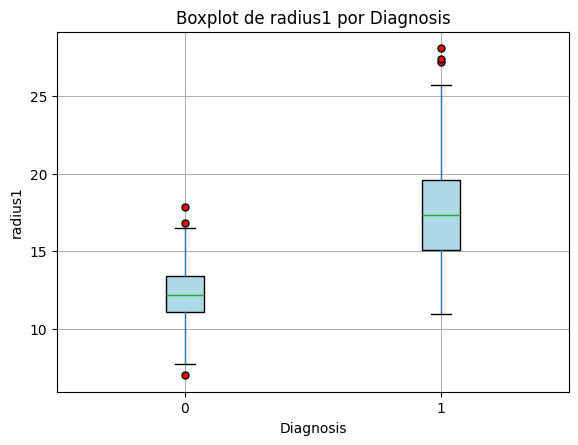

In [209]:
plt.figure(figsize=(8,6))
df.boxplot(column='radius1', by='Diagnosis', patch_artist=True, 
           boxprops=dict(facecolor='lightblue', color='black'), 
           flierprops=dict(markerfacecolor='red', marker='o', markersize=5))

# Títulos e rótulos
plt.title('Boxplot de radius1 por Diagnosis')
plt.suptitle('')  # Remove o título padrão criado pelo 'by' (groupby)
plt.xlabel('Diagnosis')
plt.ylabel('radius1')

#### A variável radius1, que representa a maior média de medida do raio, tem valores mais alto relacionados a malignidade (target: 1). E o coeficiente negativo ocorre possivelmente pela presença do valor do raio em outras variáveis como perímetro e area.